In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
py.offline.init_notebook_mode(connected = True)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:

lab = dataset["Gender"].value_counts().keys().tolist()
val = dataset["Gender"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 20,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)


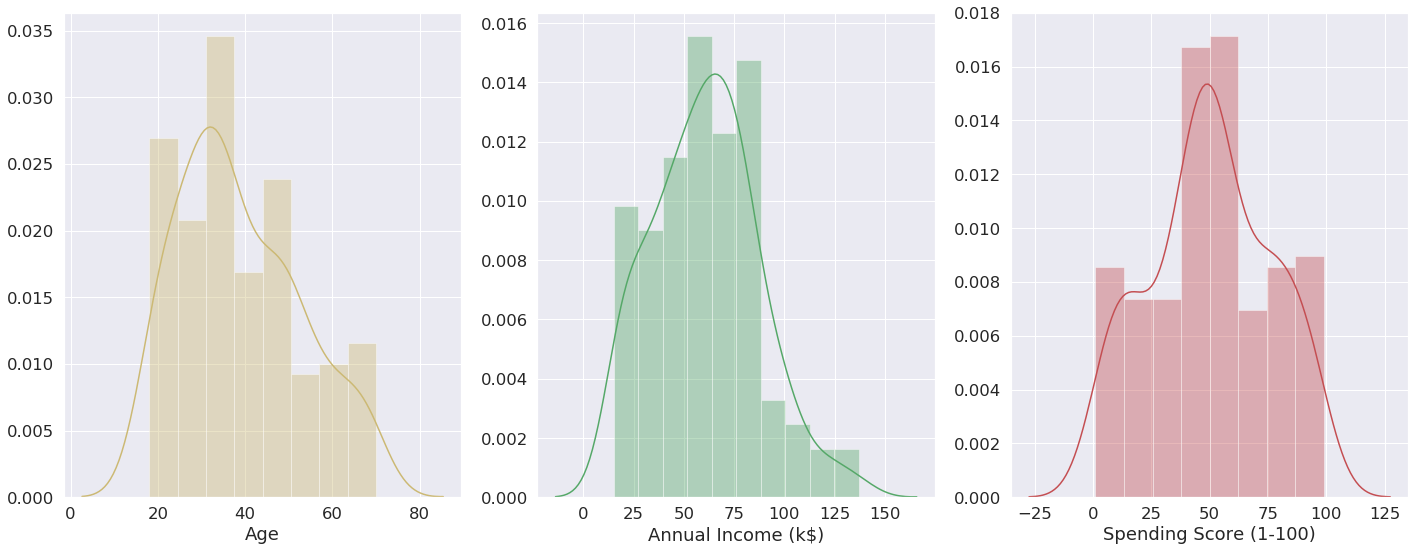

In [7]:

sns.set(style="darkgrid",font_scale=1.5)
f, axes = plt.subplots(1,3,figsize=(20,8))
sns.distplot(dataset["Age"], ax = axes[0], color = 'y')     
sns.distplot(dataset["Annual Income (k$)"], ax = axes[1], color = 'g')
sns.distplot(dataset["Spending Score (1-100)"],ax = axes[2], color = 'r')
plt.tight_layout()

In [17]:
x = dataset.iloc[:,2:]

In [23]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [10]:
x = x.values

In [11]:
from sklearn.cluster import KMeans
kMeans = KMeans(n_clusters = 3, init = 'k-means++')
y_pred = kMeans.fit_predict(x)
print('Pred:\n', y_pred)
print('\n\ninertia: ', kMeans.inertia_, '\n\nclusters centers:\n', kMeans.cluster_centers_)


Pred:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


inertia:  143342.751571706 

clusters centers:
 [[40.39473684 87.         18.63157895]
 [32.69230769 86.53846154 82.12820513]
 [40.32520325 44.15447154 49.82926829]]


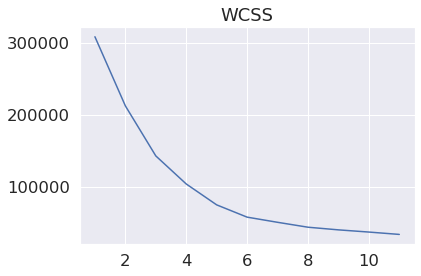

In [12]:
result = []
for i in range(1, 12):
    kMeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kMeans.fit(x)        
    result.append(kMeans.inertia_)


plt.plot(range(1,12), result)
plt.title('WCSS')
plt.show()


In [13]:
from sklearn.cluster import KMeans
kMeans = KMeans(n_clusters = 6, init = 'k-means++') 
y_pred_kMeans = kMeans.fit_predict(x)
print('Pred:\n', y_pred_kMeans)
print('\n\ninertia: ', kMeans.inertia_, '\n\nclusters centers:\n', kMeans.cluster_centers_)


Pred:
 [0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 5 4 5 2 0 4 5 2 2 2 5 2 2 5 5 5 5 5 2 5 5 2 5 5 5 2 5 5 2 2 5 5 5 5
 5 2 5 2 2 5 5 2 5 5 2 5 5 2 2 5 5 2 5 2 2 2 5 2 5 2 2 5 5 2 5 2 5 5 5 5 5
 2 2 2 2 2 5 5 5 5 2 2 2 1 2 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


inertia:  58300.44332159069 

clusters centers:
 [[44.14285714 25.14285714 19.52380952]
 [32.69230769 86.53846154 82.12820513]
 [27.         56.65789474 49.13157895]
 [41.68571429 88.22857143 17.28571429]
 [25.27272727 25.72727273 79.36363636]
 [56.15555556 53.37777778 49.08888889]]


# Hierarchical Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_pred_agg = agglomerative.fit_predict(x)
print('Pred:\n', y_pred_agg)


Pred:
 [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 5 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 5 4 5 1 5 5 5 1 5 5 1 1 1 1 1 5 1 1 5 1 1 1 5 1 1 5 5 1 1 1 1
 1 5 1 1 5 1 1 1 1 1 5 1 1 5 1 1 1 5 1 1 1 5 1 5 1 5 5 1 1 5 1 5 1 1 1 1 1
 5 1 5 5 5 1 1 1 1 5 1 1 2 5 2 0 2 0 2 0 2 5 2 0 2 0 2 0 2 0 2 5 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


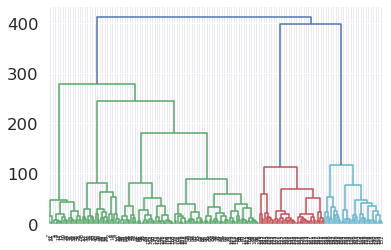

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.show()

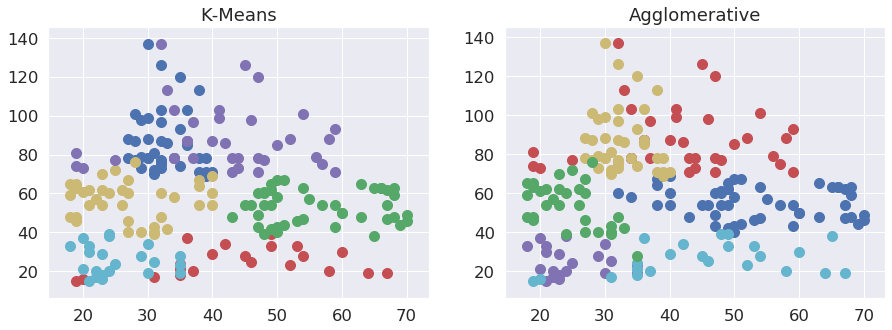

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey='col', num = 10, figsize = (15,5))
ax1.scatter(x[y_pred_kMeans == 0, 0], x[y_pred_kMeans == 0, 1], s = 100, c = 'r')
ax1.scatter(x[y_pred_kMeans == 1, 0], x[y_pred_kMeans == 1, 1], s = 100, c = 'b')
ax1.scatter(x[y_pred_kMeans == 2, 0], x[y_pred_kMeans == 2, 1], s = 100, c = 'y')
ax1.scatter(x[y_pred_kMeans == 3, 0], x[y_pred_kMeans == 3, 1], s = 100, c = 'm')
ax1.scatter(x[y_pred_kMeans == 4, 0], x[y_pred_kMeans == 4, 1], s = 100, c = 'c')
ax1.scatter(x[y_pred_kMeans == 5, 0], x[y_pred_kMeans == 5, 1], s = 100, c = 'g')

ax1.title.set_text('K-Means')

ax2.scatter(x[y_pred_agg == 0, 0], x[y_pred_agg == 0, 1], s = 100, c = 'r')
ax2.scatter(x[y_pred_agg == 1, 0], x[y_pred_agg == 1, 1], s = 100, c = 'b')
ax2.scatter(x[y_pred_agg == 2, 0], x[y_pred_agg == 2, 1], s = 100, c = 'y')
ax2.scatter(x[y_pred_agg == 3, 0], x[y_pred_agg == 3, 1], s = 100, c = 'm')
ax2.scatter(x[y_pred_agg == 4, 0], x[y_pred_agg == 4, 1], s = 100, c = 'c')
ax2.scatter(x[y_pred_agg == 5, 0], x[y_pred_agg == 5, 1], s = 100, c = 'g')

ax2.title.set_text('Agglomerative')
f.show()
